1. Separate Virgo galaxies based on environment (field vs. cluster)
2. Cut this result such that the medium-sized galaxies remain (those with SNR>20 but median sizes and median masses)
3. Run GALFIT on this sample.
4. Extract from the resulting .txt file the Sersic index column, generate histogram.
5. Try to "qualify" expectations of the fraction of quenched (red n' dead) vs. active (spiral) galaxies according to papers, in cluster versus field environments.
6. Compare to simulated outcomes.
    1. Dice rolls. First have a look at output data from GALFIT, then tailor bins according to output Sersic indices. 
    2. Compare null to proposed hypothesis (the latter of which claiming that cluster galaxies tend to exhibit more quenched profiles?)
    3. Perform KS test (see Greg's Slack message) to determine whether actual data aligns more soundly with null or proposed hypothesis.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from astropy.table import Table
import os

In [3]:
#in separate notebook, I pulled all sample galaxies with SNR>20 and non-nan entries in applicable columns
#.fits files are all located in current directory

#one potential source of bias...assuming there is no underlying trend resulting is particular galaxies
#having nan entries -- that the selection is 'random' and relatively uniform.
#ANOTHER source...by applying the SNR cut, I am removing fainter galaxies (in part) --> more diffuse, may 
#be stripped more easily.
mgstab = Table.read('sample_mgs.fits')
hyptab = Table.read('sample_hyp.fits')
unwisetab = Table.read('sample_unwise.fits')
vftab = Table.read('sample_vfmain.fits')
envtab = Table.read('sample_env.fits')

In [4]:
mgstab

cntr_01,dist_x,pang_x,galid_01,ra_01,dec_01,major_01,pgc_name,pgc,ra,dec,gl_deg,gb_deg,resolution,has_fuv,has_nuv,has_wise1,has_wise2,has_wise3,has_wise4,time_fuv,time_nuv,afuv,anuv,rms_fuv,std_fuv,rms_nuv,std_nuv,rms_wise1,std_wise1,rms_wise2,std_wise2,rms_wise3,std_wise3,rms_wise4,std_wise4,sat_effects_fuv,star_area_fuv,star_flux_fuv,star_flag_fuv,sat_effects_nuv,star_area_nuv,star_flux_nuv,star_flag_nuv,sat_effects_wise1,star_area_wise1,star_flux_wise1,star_flag_wise1,sat_effects_wise2,star_area_wise2,star_flux_wise2,star_flag_wise2,sat_effects_wise3,star_area_wise3,star_flux_wise3,star_flag_wise3,sat_effects_wise4,star_area_wise4,star_flux_wise4,star_flag_wise4,galaxy_mask_overlap,galaxy_overlap_flag,flux_fuv,rms_flux_fuv,std_flux_fuv,flux_nuv,rms_flux_nuv,std_flux_nuv,flux_wise1,rms_flux_wise1,std_flux_wise1,flux_wise2,rms_flux_wise2,std_flux_wise2,flux_wise3,rms_flux_wise3,std_flux_wise3,flux_wise4,rms_flux_wise4,std_flux_wise4,dist_mpc,e_dist_dex,mtol,method_mtol,logmass,e_logmass,logsfr,e_logsfr,method_sfr,deltams,absbtc,complete_sample,summary_url,Z0MGSflag
,arcsec,deg,,,,,,,deg,deg,deg,deg,,,,,,,,s,s,mag,mag,MJy / sr,MJy / sr,MJy / sr,MJy / sr,MJy / sr,MJy / sr,MJy / sr,MJy / sr,MJy / sr,MJy / sr,MJy / sr,MJy / sr,,,,,,,,,,,,,,,,,,,,,,,,,,,Jy,Jy,Jy,Jy,Jy,Jy,Jy,Jy,Jy,Jy,Jy,Jy,Jy,Jy,Jy,Jy,Jy,Jy,Mpc,'dex',solMass / solLum,,log(solMass),'dex',log(solMass/yr),'dex',,'dex',mag,,,
int64,float64,float64,float64,float64,float64,float64,bytes10,int64,float64,float64,float64,float64,bytes7,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes8,float64,float64,float64,float64,bytes9,float64,float64,int64,bytes61,bool
6,0.004386,-60.497086,2866.0,173.13418579,74.627540588,10.0,PGC35608,35608,173.134186,74.627541,129.78598,41.434036,gauss15,1,1,1,1,1,1,139.6,128.0,0.432,0.432,0.00022513,0.00042171,0.00021952,0.024139,0.00214,0.17878,0.00242,0.09944,0.011813,0.021265,0.10485,0.1136,0,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0.0,0,0.0012787,2.0911e-06,3.4826e-06,0.0018859,2.1358e-06,0.00016472,0.026637,1.0179e-05,0.0013471,0.016305,1.7264e-05,0.00075828,0.06335,0.00019757,0.00024839,0.074504,0.0007977,0.00086432,28.97,0.125,0.391,SSFRLIKE,9.76,0.1,-0.55,0.2,FUV+WISE4,-0.28,-19.38,1,"<a href=""/data/WISE/z0MGS/images/PGC35608.html"">Summary</a>",True
53,0.003399,64.934684,7906.0,259.02197266,73.436050415,10.0,PGC59971,59971,259.021973,73.43605,104.889076,32.656708,gauss15,0,1,1,1,1,1,nan,95.2,nan,0.412,nan,nan,0.00029772,0.0012464,0.00345,0.04598,0.00357,0.02664,0.011999,0.014663,0.085068,0.089273,0,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0.0,0,nan,nan,nan,0.0026133,2.2459e-06,7.3918e-06,0.039758,8.8349e-06,0.00027216,0.023461,1.3418e-05,0.00015967,0.085151,0.00013507,0.00015163,0.12172,0.00052294,0.00054878,23.004,0.278,0.376,SSFRLIKE,9.71,0.1,-0.53,0.2,NUV+WISE4,-0.23,-19.326,1,"<a href=""/data/WISE/z0MGS/images/PGC59971.html"">Summary</a>",True
77,0.03476,-88.219526,7904.0,256.14144897,72.446655273,10.0,PGC59551,59551,256.141418,72.446655,104.029373,33.74057,gauss15,1,1,1,1,1,1,1688.0,1552.6,0.386,0.386,8.5494e-05,0.00015495,0.0001028,0.0037474,0.00268,0.50491,0.00281,0.27013,0.0094497,0.04675,0.078572,0.085585,0,0.0,0.0,0,0,0.126,0.108,0,0,0.192,0.275,1,0,0.172,0.19,0,0,0.0,0.0,0,0,0.0,0.0,0,0.0,0,0.00086921,9.0062e-07,1.3881e-06,0.0014254,9.0355e-07,3.2267e-05,0.027143,1.1603e-05,0.0042949,0.016854,1.7788e-05,0.002324,0.078314,0.0001713,0.00045738,0.10437,0.00069271,0.00075453,26.06,0.125,0.37,SSFRLIKE,9.65,0.12,-

In [5]:
hyptab

VFID,RA,DEC,NEDname,objname,objtype,de2000,al2000,v,e_v,vopt_1,e_vopt,vrad,e_vrad,bt,e_bt,type_1,bar,ring,multiple,compactness,t,e_t,logd25,e_logd25,logr25,e_logr25,pa,incl,logdc,btc,itc,ubtc,bvtc,m21c,hic,mabs,agnclass,kt,e_kt,it,e_it,ut,vt,mfir,e_ut,e_vt
bytes8,float64,float64,bytes30,bytes28,bytes1,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes4,bytes1,bytes1,bytes1,bytes1,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes4,float64,float64,float64,float64,float64,float64,float64,float64,float64
VFID0005,173.1341835,74.6275401,NGC 3752,NGC3752,G,74.6275401,11.5422789,1920.1,8.1,1961.0,14.0,1917.2,3.7,13.611,0.325,SABa,B,N,N,N,2.1,0.5,1.21,0.032,0.378,0.023,151.68,71.53,1.215,12.93,12.443,nan,nan,16.224,3.294,-19.268,N/A,10.442,0.084,12.536,0.078,nan,13.81,13.272,nan,0.1
VFID0052,259.0219695,73.4360503,UGC 10803,UGC10803,G,73.4360503,17.2681313,1253.4,6.5,1251.3,13.5,1255.0,12.1,12.842,0.321,SABa,B,N,M,N,1.5,2.9,1.038,0.071,0.13,0.04,24.47,44.84,1.052,12.483,nan,nan,nan,15.051,2.568,-19.326,N/A,9.903,0.028,nan,nan,nan,nan,nan,nan,nan
VFID0076,256.1414385,72.4466523,UGC 10713,UGC10713,G,72.4466523,17.0760959,1071.5,3.6,1131.4,59.1,1071.3,3.5,13.703,0.327,SBb,B,N,N,N,3.0,0.4,1.256,0.06,0.717,0.044,6.5,90.0,1.246,12.569,nan,nan,nan,14.724,2.155,-19.792,H2,10.602,0.043,nan,nan,nan,14.0,12.789,nan,0.1
VFID0078,257.554614,72.4106026,IC 1251,IC1251,G,72.4106026,17.1703076,1170.3,7.5,1232.2,29.7,1168.8,4.6,14.334,0.322,Sc,N,N,N,N,6.0,0.4,1.082,0.045,0.273,0.037,66.76,59.26,1.091,13.635,13.162,nan,nan,14.867,1.232,-19.539,N/A,12.034,0.107,13.256,0.078,nan,nan,nan,nan,nan
VFID0079,257.889294,72.4019766,IC 1254,IC1254,G,72.4019766,17.1926196,1205.3,9.4,1283.0,49.0,1203.7,7.1,15.105,0.05,Sb,B,N,N,N,3.4,1.5,0.96,0.051,0.23,0.03,38.41,56.53,0.971,14.528,nan,0.434,1.062,15.249,0.721,-17.226,N/A,11.67,0.085,nan,nan,15.655,13.945,nan,0.05,0.05
VFID0080,258.6611355,72.3987504,UGC 10791,UGC10791,G,72.3987504,17.2440757,1327.8,3.0,1315.0,91.0,1327.8,4.2,15.4,0.327,Sm,B,R,N,D,8.8,0.5,1.27,0.068,0.0,0.057,nan,0.0,1.29,15.189,nan,nan,nan,15.968,0.779,-17.367,N/A,nan,nan,nan,nan,nan,nan,nan,nan,nan
VFID0081,257.60373749999997,72.3043878,NGC 6340,NGC6340,G,72.3043878,17.1735825,1215.0,14.3,1245.7,5.5,1202.0,3.6,11.966,0.091,S0-a,N,R,N,N,0.4,0.6,1.483,0.052,0.023,0.048,nan,19.91,1.502,11.726,nan,nan,0.798,14.89,3.164,-20.028,N/A,8.414,0.039,nan,nan,nan,11.106,nan,nan,0.091
VFID0100,173.641458,71.5400833,UGC 06552,UGC06552,G,71.5400833,11.5760972,2805.8,4.4,2807.0,50.4,2805.8,6.2,14.274,0.318,Sc,N,N,N,N,6.1,1.8,0.858,0.076,0.402,0.025,38.4,68.88,0.849,13.474,nan,nan,nan,14.878,1.404,-19.772,N/A,12.373,0.215,nan,nan,nan,nan,nan,nan,nan
VFID0109,261.630336,71.096297,NGC 6395,NGC6395,G,71.096297,17.4420224,1162.7,2.3,1190.0,69.0,1162.7,3.0,12.685,0.331,SBc,B,N,N,N,5.8,0.5,1.352,0.028,0.491,0.023,16.67,74.3,1.349,11.659,12.018,nan,nan,14.68,3.021,-19.881,N/A,10.91,0.36,12.095,0.062,nan,nan,13.531,nan,nan


In [6]:
envtab

VFID,flag_clus,flag_fil,flag_isol,flag_gro,flag_clus_k
bytes8,float64,float64,float64,float64,float64
VFID0005,0.0,0.0,1.0,0.0,1.0
VFID0052,0.0,0.0,1.0,0.0,0.0
VFID0076,0.0,0.0,0.0,2.0,0.0
VFID0078,0.0,0.0,0.0,2.0,0.0
VFID0079,0.0,0.0,0.0,2.0,0.0
VFID0080,0.0,0.0,0.0,2.0,0.0
VFID0081,0.0,0.0,0.0,2.0,0.0
VFID0100,0.0,0.0,1.0,0.0,0.0
VFID0109,0.0,0.0,1.0,0.0,0.0


In [7]:
unwisetab

objid,ra_2,dec_2,run,camcol,field,raerr,decerr,pointsource,treated_as_pointsource,x,y,coadd_id,w1_nanomaggies,w1_nanomaggies_ivar,w1_mag,w1_mag_err,w1_prochi2,w1_pronpix,w1_profracflux,w1_proflux,w1_npix,w1_pronexp,w2_nanomaggies,w2_nanomaggies_ivar,w2_mag,w2_mag_err,w2_prochi2,w2_pronpix,w2_profracflux,w2_proflux,w2_npix,w2_pronexp,w3_nanomaggies,w3_nanomaggies_ivar,w3_mag,w3_mag_err,w3_prochi2,w3_pronpix,w3_profracflux,w3_proflux,w3_npix,w3_pronexp,w4_nanomaggies,w4_nanomaggies_ivar,w4_mag,w4_mag_err,w4_prochi2,w4_pronpix,w4_profracflux,w4_proflux,w4_npix,w4_pronexp
bytes19,float64,float64,int16,uint8,int16,float64,float64,uint8,uint8,float32,float32,bytes8,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
1237671686936461457,173.1375849684363,74.62756041512199,6103,4,104,0.04307543548931827,0.04525354909683398,1,0,1569.7096,1580.2783,1747p742,1559.0476,0.008890234,14.517852,0.007385983,415.14755,0.98503447,0.45461965,708.77313,770.0,43.726894,2006.8763,0.0008266266,14.243698,0.018816939,56.33331,0.9742717,0.351188,704.79047,406.0,44.52667,74445.625,2.0267814e-07,10.320402,0.032395273,24.75776,0.9074903,0.12683754,9442.499,890.0,25.413132,534061.1,2.256688e-10,8.181023,0.13533108,3.1746116,1.0213982,0.06012983,32112.982,678.0,23.394146
1237656564356546695,259.02193143228965,73.43627752875976,2582,4,103,0.002368972525750811,0.002597977397376596,0,0,584.2958,2000.4603,2578p726,151954.19,0.0015374394,9.545718,0.00018222696,746.1895,0.97308165,0.00010350376,15.727822,4871.0,80.59215,156119.2,0.00018839558,9.516359,0.0005066787,71.71359,0.9470298,0.00011157372,17.418839,2200.0,80.27164,3081498.8,5.8117376e-08,6.2780952,0.0014615353,121.32582,0.9322085,0.00024241733,747.0097,2685.0,37.61192,15337530.0,1.3270098e-10,4.5356116,0.0061451406,5.471925,0.9831171,0.0003834957,5881.8706,1382.0,39.86027
1237655747235872865,256.1416750306362,72.44663908092038,2392,2,55,0.013317436118144524,0.013957261000667008,0,0,1695.97,710.08496,2578p726,100163.12,0.0014123719,9.99823,0.000288431,1796.1617,0.97578907,0.0001006347,10.0798855,1807.0,87.782936,112296.35,0.00015947205,9.874085,0.0007656254,379.2872,0.9603927,0.00010916907,12.259288,1202.0,87.84415,3239716.2,5.9475866e-08,6.2237325,0.0013741904,90.53596,0.9408423,8.198897e-05,265.6209,2387.0,46.577168,14118528.0,1.2546436e-10,4.6255264,0.0068655405,11.614189,1.0076015,0.000109453984,1545.3289,1445.0,45.749752
1237655747772809511,257.55374356061236,72.41051323813136,2392,3,56,0.06936003275539936,0.04098218207578151,0,0,1138.7622,653.53955,2578p726,25385.719,0.0012301075,11.488526,0.0012194479,22.726336,0.9622319,0.00028118896,7.1381855,990.0,92.53172,23629.184,0.00014447838,11.566379,0.0038227346,2.7545278,0.9388385,0.0007005471,16.553358,734.0,91.17907,210237.5,5.5675198e-08,9.193225,0.021886846,0.8081089,0.7682803,0.00064693525,136.01003,399.0,40.740654,1243009.5,1.245171e-10,7.263814,0.07827721,0.9927093,0.8997722,0.0018025612,2240.5999,586.0,43.053226
1237655747772874782,257.88991995631955,72.40204404641648,2392,3,57,0.017524685880100317,0.017336887421285415,0,0,1005.7611,642.1796,2578p726,38960.824,0.0010990233,11.02343,0.00084060634,60.7355,0.96473694,0.00014055305,5.4760613,1238.0,96.42878,33866.74,0.00012941718,11.175567,0.0028180906,3.123416,0.94047487,0.0006281328,21.27282,883.0,94.537224,138929.2,4.4324562e-08,9.643016,0.037120048,0.88555574,0.6422238,0.000831385,115.50367,292.0,34.30117,547394.7,9.69036e-11,8.154248,0.20149012,0.6537728,0.6808485,0.0016945882,927.6087,305.0,31.728264
1237656563820134539,258.6612041458035,72.39860880909997,2582,3,110,0.016225241294410095,0.01668366831903957,0,0,700.44116,639.86896,2578p726,53932.367,1.7694974e-05,10.670376,0.004785748,8.076965,0.032147866,6.851107e-06,0.36949638,26.0,

In [9]:
vftab

VFID,RA,DEC,vr,radius,radius_flag,objname,NSAID,NSAIDV0,AGC,NEDname,HLflag,NSAflag,NSAV0flag,A100flag,COflag,HAflag,HAobsflag,Z0MGSflag,Steerflag,unwiseflag,prefix,name
,,,,arcsec,,,,,,,,,,,,,,,,,,
bytes8,float64,float64,float64,float32,bool,bytes28,int32,int32,int64,bytes30,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bytes36,bytes8
VFID0005,173.1341835,74.6275401,1920.1,48.654305,True,NGC3752,0,0,0,NGC 3752,True,False,False,False,False,False,False,True,True,True,VFID0005-NGC3752,VFID0005
VFID0052,259.0219695,73.4360503,1253.4,32.74321,True,UGC10803,634197,147869,0,UGC 10803,True,True,True,False,False,False,False,True,False,True,VFID0052-UGC10803,VFID0052
VFID0076,256.1414385,72.4466523,1071.5,54.09053,True,UGC10713,634027,147690,0,UGC 10713,True,True,True,False,False,False,False,True,True,True,VFID0076-UGC10713,VFID0076
VFID0078,257.554614,72.4106026,1170.3,36.234413,True,IC1251,634104,147774,0,IC 1251,True,True,True,False,False,False,False,True,True,True,VFID0078-IC1251,VFID0078
VFID0079,257.889294,72.4019766,1205.3,27.360325,True,IC1254,634121,147791,0,IC 1254,True,True,True,False,False,False,False,True,False,True,VFID0079-IC1254,VFID0079
VFID0080,258.6611355,72.3987504,1327.8,55.862614,True,UGC10791,634177,147849,0,UGC 10791,True,True,True,False,False,False,False,True,True,True,VFID0080-UGC10791,VFID0080
VFID0081,257.60373749999997,72.3043878,1215.0,91.22655,True,NGC6340,634108,147778,0,NGC 6340,True,True,True,False,False,False,False,True,True,True,VFID0081-NGC6340,VFID0081
VFID0100,173.641458,71.5400833,2805.8,21.633224,True,UGC06552,626896,139785,0,UGC 06552,True,True,True,False,False,False,False,True,False,True,VFID0100-UGC06552,VFID0100


In [72]:
#now separate galaxies according to location -- either cluster or field (or filament, since #fil>#clus)

cluster_flag = (envtab['flag_clus']>0)
field_flag = (envtab['flag_isol']>0)
fil_flag = (envtab['flag_fil']>0)
print(len(vftab[cluster_flag]))
print(len(vftab[field_flag]))
print(len(vftab[fil_flag]))

236
591
505


Text(0, 0.5, 'counts (filament)')

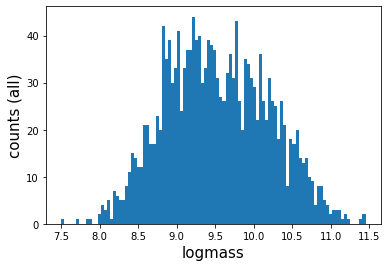

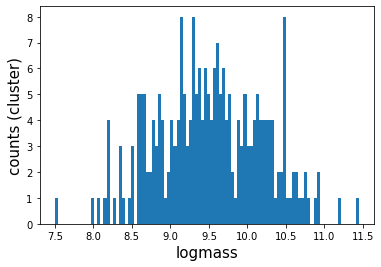

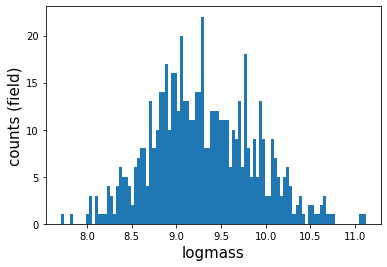

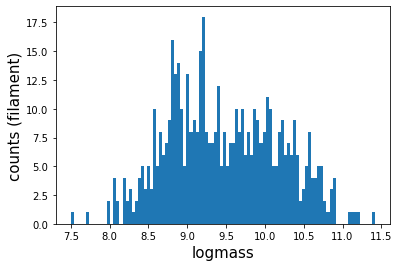

In [94]:
#Galaxies are already cut according to SNR>20. Since GALFIT performs somewhat poorly on the most massive
#galaxies with the highest SNR (GALFIT fits a smooth model regardless of whether the image is clumpy),
#I should create yet another cut such that only galaxies with "medium masses" are selected.

plt.figure()
plt.hist(mgstab['logmass'],bins=100)
plt.xlabel('logmass',fontsize=15)
plt.ylabel('counts (all)',fontsize=15)

plt.figure()
plt.hist(mgstab['logmass'][cluster_flag],bins=100)
plt.xlabel('logmass',fontsize=15)
plt.ylabel('counts (cluster)',fontsize=15)

plt.figure()
plt.hist(mgstab['logmass'][field_flag],bins=100)
plt.xlabel('logmass',fontsize=15)
plt.ylabel('counts (field)',fontsize=15)

plt.figure()
plt.hist(mgstab['logmass'][fil_flag],bins=100)
plt.xlabel('logmass',fontsize=15)
plt.ylabel('counts (filament)',fontsize=15)

In [64]:
len(mgstab[np.where((mgstab['logmass']<10.5))[0]])

1560

In [73]:
cluster_flag = (envtab['flag_clus']>0)
field_flag = (envtab['flag_isol']>0)
fil_flag = (envtab['flag_fil']>0)

mass_flag = (mgstab['logmass']<10)
cluster_flag = cluster_flag & mass_flag
field_flag = field_flag & mass_flag
fil_flag = fil_flag & mass_flag
print(len(vftab[cluster_flag]))
print(len(vftab[field_flag]))
print(len(vftab[fil_flag]))

173
523
370


In [89]:
vf_cluster = vftab[cluster_flag]
vf_field = vftab[field_flag]
vf_filament = vftab[fil_flag]

In [98]:
#first run on cluster galaxies

homedir = os.getenv("HOME")
os.chdir(homedir+'/github/cluster')
%run ~/github/research/run_galfit.py


#run first without psf...then add psf? (Or not - requires too many hours to implement.)
run_galfit_no_psf(vf_cluster,'cluster','test_no_psf')

VFID3231-IC3215
wise image size =  76
downloading unwise images
http://unwise.me/cutout_fits?version=allwise&ra=185.54241&dec=26.05215&size=76&bands=3
['unwise-1850p257-w3-img-m.fits', 'unwise-1850p257-w3-invvar-m.fits.gz', 'unwise-1850p257-w3-n-m.fits.gz', 'unwise-1850p257-w3-std-m.fits.gz']
(76, 76)
self.psfimage =  wise-w3-psf-wpro-09x09-05x05.fits
sersic n, fitsersicn =  2 1
BA, fitBA =  1 1
run the following:  galfit VFID3231-IC3215-unwise-w3-galfit.input.1Comp
1_XC  : 50.5133 +/- 0.0344
1_YC  : 33.7262 +/- 0.0950
1_MAG : 7.3443 +/- 2.8046
1_RE  : 261.7019 +/- 1104.3918
1_N   : 7.8582 +/- 6.4892
1_AR  : 0.5899 +/- 0.0787
1_PA  : 20.7065 +/- 7.4477
2_SKY : 22.0491 +/- 14.3970
who's zoomin' who?
VFID3237-NGC4565
wise image size =  1004
downloading unwise images
http://unwise.me/cutout_fits?version=allwise&ra=189.08660&dec=25.98752&size=1004&bands=3
['unwise-1883p257-w3-img-m.fits', 'unwise-1883p257-w3-invvar-m.fits.gz', 'unwise-1883p257-w3-n-m.fits.gz', 'unwise-1883p257-w3-std-m.fit

1_XC  : 97.3937 +/- 0.0037
1_YC  : 97.0110 +/- 0.0070
1_MAG : 5.8025 +/- 0.0018
1_RE  : 4.2877 +/- 0.0112
1_N   : 0.8438 +/- 0.0047
1_AR  : 0.5733 +/- 0.0012
1_PA  : -15.4100 +/- 0.1484
2_SKY : -2.9905 +/- 2.6912
who's zoomin' who?
VFID3829-NGC4293
wise image size =  374
downloading unwise images
http://unwise.me/cutout_fits?version=allwise&ra=185.30396&dec=18.38300&size=374&bands=3
['unwise-1855p181-w3-img-m.fits', 'unwise-1855p181-w3-invvar-m.fits.gz', 'unwise-1855p181-w3-n-m.fits.gz', 'unwise-1855p181-w3-std-m.fits.gz']
(374, 374)
self.psfimage =  wise-w3-psf-wpro-09x09-05x05.fits
sersic n, fitsersicn =  2 1
BA, fitBA =  1 1
run the following:  galfit VFID3829-NGC4293-unwise-w3-galfit.input.1Comp
1_XC  : 188.2939 +/- 0.0054
1_YC  : 187.8230 +/- 0.0045
1_MAG : 5.6230 +/- 0.0030
1_RE  : 3.9990 +/- 0.0211
1_N   : 1.9327 +/- 0.0109
1_AR  : 0.8065 +/- 0.0024
1_PA  : 67.7478 +/- 0.5441
2_SKY : 23.8256 +/- 1.4008
who's zoomin' who?
VFID3838-UGC06670
wise image size =  91
downloading unwise

['unwise-1870p166-w3-img-m.fits', 'unwise-1870p166-w3-invvar-m.fits.gz', 'unwise-1870p166-w3-n-m.fits.gz', 'unwise-1870p166-w3-std-m.fits.gz']
(327, 327)
self.psfimage =  wise-w3-psf-wpro-09x09-05x05.fits
sersic n, fitsersicn =  2 1
BA, fitBA =  1 1
run the following:  galfit VFID3982-NGC4450-unwise-w3-galfit.input.1Comp
1_XC  : 163.0824 +/- 0.0121
1_YC  : 164.5192 +/- 0.0147
1_MAG : 5.4391 +/- 0.0128
1_RE  : 21.1141 +/- 0.3839
1_N   : 2.4019 +/- 0.0245
1_AR  : 0.5653 +/- 0.0040
1_PA  : -1.2248 +/- 0.4429
2_SKY : 2.6594 +/- 1.9949
who's zoomin' who?
VFID4005-NGC4489
wise image size =  103
downloading unwise images
http://unwise.me/cutout_fits?version=allwise&ra=187.71769&dec=16.75882&size=103&bands=3
['unwise-1870p166-w3-img-m.fits', 'unwise-1870p166-w3-invvar-m.fits.gz', 'unwise-1870p166-w3-n-m.fits.gz', 'unwise-1870p166-w3-std-m.fits.gz']
(103, 103)
self.psfimage =  wise-w3-psf-wpro-09x09-05x05.fits
sersic n, fitsersicn =  2 1
BA, fitBA =  1 1
run the following:  galfit VFID4005-NGC4

VFID4105-UGC06655
wise image size =  42
downloading unwise images
http://unwise.me/cutout_fits?version=allwise&ra=175.46089&dec=15.97368&size=42&bands=3
['unwise-1760p166-w3-img-m.fits', 'unwise-1760p166-w3-invvar-m.fits.gz', 'unwise-1760p166-w3-n-m.fits.gz', 'unwise-1760p166-w3-std-m.fits.gz']
(42, 42)
self.psfimage =  wise-w3-psf-wpro-09x09-05x05.fits
sersic n, fitsersicn =  2 1
BA, fitBA =  1 1
run the following:  galfit VFID4105-UGC06655-unwise-w3-galfit.input.1Comp
1_XC  : 21.8284 +/- 0.0367
1_YC  : 22.0541 +/- 0.0471
1_MAG : 8.8393 +/- 0.0251
1_RE  : 3.0614 +/- 0.1019
1_N   : 0.8425 +/- 0.0321
1_AR  : 0.7945 +/- 0.0165
1_PA  : 21.4453 +/- 4.8178
2_SKY : -7.5468 +/- 14.0341
who's zoomin' who?
VFID4113-NGC4322
wise image size =  73
downloading unwise images
http://unwise.me/cutout_fits?version=allwise&ra=185.75718&dec=15.90553&size=73&bands=3
['unwise-1855p166-w3-img-m.fits', 'unwise-1855p166-w3-invvar-m.fits.gz', 'unwise-1855p166-w3-n-m.fits.gz', 'unwise-1855p166-w3-std-m.fits.gz'

1_XC  : 78.3251 +/- 0.0109
1_YC  : 79.6346 +/- 0.0138
1_MAG : 6.3587 +/- 0.0026
1_RE  : 6.0003 +/- 0.0223
1_N   : 0.5146 +/- 0.0038
1_AR  : 0.4962 +/- 0.0016
1_PA  : 37.9365 +/- 0.1856
2_SKY : 44.8142 +/- 3.3161
who's zoomin' who?
VFID4211-IC0781
wise image size =  78
downloading unwise images
http://unwise.me/cutout_fits?version=allwise&ra=185.01371&dec=14.96152&size=78&bands=3
['unwise-1846p151-w3-img-m.fits', 'unwise-1846p151-w3-invvar-m.fits.gz', 'unwise-1846p151-w3-n-m.fits.gz', 'unwise-1846p151-w3-std-m.fits.gz']
(78, 78)
self.psfimage =  wise-w3-psf-wpro-09x09-05x05.fits
sersic n, fitsersicn =  2 1
BA, fitBA =  1 1
run the following:  galfit VFID4211-IC0781-unwise-w3-galfit.input.1Comp
1_XC  : 29.9706 +/- 1.1854
1_YC  : 42.7671 +/- 0.2485
1_MAG : 10.0203 +/- 0.1094
1_RE  : 13.6766 +/- 1.0977
1_N   : 0.1407 +/- 0.0629
1_AR  : 0.2099 +/- 0.0206
1_PA  : 86.3685 +/- 1.5075
2_SKY : -7.0728 +/- 6.8374
who's zoomin' who?
VFID4214-IC3806
wise image size =  77
downloading unwise images
h

1_XC  : 29.1651 +/- 0.2356
1_YC  : 27.8199 +/- 0.2488
1_MAG : 9.1239 +/- 2.8327
1_RE  : 38.1308 +/- 133.9993
1_N   : 4.2616 +/- 4.3711
1_AR  : 0.7672 +/- 0.2091
1_PA  : 47.2188 +/- 33.4763
2_SKY : -24.6220 +/- 24.3173
who's zoomin' who?
VFID4325-NGC4019
wise image size =  88
downloading unwise images
http://unwise.me/cutout_fits?version=allwise&ra=180.29363&dec=14.10403&size=88&bands=3
['unwise-1800p136-w3-img-m.fits', 'unwise-1800p136-w3-invvar-m.fits.gz', 'unwise-1800p136-w3-n-m.fits.gz', 'unwise-1800p136-w3-std-m.fits.gz']
(88, 88)
self.psfimage =  wise-w3-psf-wpro-09x09-05x05.fits
sersic n, fitsersicn =  2 1
BA, fitBA =  1 1
run the following:  galfit VFID4325-NGC4019-unwise-w3-galfit.input.1Comp
1_XC  : 45.1558 +/- 0.0263
1_YC  : 45.2410 +/- 0.0400
1_MAG : 8.0736 +/- 0.0135
1_RE  : 5.3562 +/- 0.0992
1_N   : 0.8410 +/- 0.0227
1_AR  : 0.4324 +/- 0.0046
1_PA  : -33.1774 +/- 0.6244
2_SKY : -1.7667 +/- 5.5907
who's zoomin' who?
VFID4335-NGC4468
wise image size =  92
downloading unwise 

1_XC  : 87.8562 +/- 0.0388
1_YC  : 86.7060 +/- 0.0626
1_MAG : 6.1262 +/- 0.0050
1_RE  : 11.4743 +/- 0.0683
1_N   : 0.3710 +/- 0.0059
1_AR  : 0.6288 +/- 0.0039
1_PA  : -20.5551 +/- 0.5180
2_SKY : -37.5800 +/- 3.5954
who's zoomin' who?
VFID4480-NGC4165
wise image size =  74
downloading unwise images
http://unwise.me/cutout_fits?version=allwise&ra=183.04914&dec=13.24647&size=74&bands=3
['unwise-1831p136-w3-img-m.fits', 'unwise-1831p136-w3-invvar-m.fits.gz', 'unwise-1831p136-w3-n-m.fits.gz', 'unwise-1831p136-w3-std-m.fits.gz']
(74, 74)
self.psfimage =  wise-w3-psf-wpro-09x09-05x05.fits
sersic n, fitsersicn =  2 1
BA, fitBA =  1 1
run the following:  galfit VFID4480-NGC4165-unwise-w3-galfit.input.1Comp
1_XC  : 38.0159 +/- 0.0706
1_YC  : 37.8939 +/- 0.1130
1_MAG : 7.9740 +/- 0.0165
1_RE  : 8.0703 +/- 0.1178
1_N   : 0.3239 +/- 0.0145
1_AR  : 0.5318 +/- 0.0084
1_PA  : -23.4194 +/- 1.0715
2_SKY : 32.5680 +/- 7.6187
who's zoomin' who?
VFID4482-NGC4458
wise image size =  95
downloading unwise ima

1_XC  : 45.0192 +/- 0.2008
1_YC  : 47.9324 +/- 0.5179
1_MAG : 10.3827 +/- 0.1673
1_RE  : 6.3243 +/- 1.3725
1_N   : 0.9511 +/- 0.2130
1_AR  : 0.4482 +/- 0.0524
1_PA  : -8.3665 +/- 6.7580
2_SKY : -53.9080 +/- 6.0307
who's zoomin' who?
VFID4693-NGC5058
wise image size =  45
downloading unwise images
http://unwise.me/cutout_fits?version=allwise&ra=199.21789&dec=12.54831&size=45&bands=3
['unwise-1993p121-w3-img-m.fits', 'unwise-1993p121-w3-invvar-m.fits.gz', 'unwise-1993p121-w3-n-m.fits.gz', 'unwise-1993p121-w3-std-m.fits.gz']
(45, 45)
self.psfimage =  wise-w3-psf-wpro-09x09-05x05.fits
sersic n, fitsersicn =  2 1
BA, fitBA =  1 1
run the following:  galfit VFID4693-NGC5058-unwise-w3-galfit.input.1Comp
1_XC  : 23.3320 +/- 0.0647
1_YC  : 22.0825 +/- 0.0908
1_MAG : 8.7851 +/- 0.0278
1_RE  : 4.9095 +/- 0.1847
1_N   : 0.8368 +/- 0.0446
1_AR  : 0.7072 +/- 0.0162
1_PA  : 18.9715 +/- 3.4103
2_SKY : 78.3245 +/- 11.4440
who's zoomin' who?
VFID4708-NGC4880
wise image size =  157
downloading unwise ima

1_XC  : 36.2277 +/- 0.0105
1_YC  : 37.3252 +/- 0.0101
1_MAG : 7.2693 +/- 0.0064
1_RE  : 3.0466 +/- 0.0271
1_N   : 0.9897 +/- 0.0105
1_AR  : 0.8651 +/- 0.0047
1_PA  : 71.3762 +/- 1.8091
2_SKY : 28.2076 +/- 7.1560
who's zoomin' who?
VFID4819-IC0767
wise image size =  55
downloading unwise images
http://unwise.me/cutout_fits?version=allwise&ra=182.76141&dec=12.10396&size=55&bands=3
['unwise-1823p121-w3-img-m.fits', 'unwise-1823p121-w3-invvar-m.fits.gz', 'unwise-1823p121-w3-n-m.fits.gz', 'unwise-1823p121-w3-std-m.fits.gz']
(55, 55)
self.psfimage =  wise-w3-psf-wpro-09x09-05x05.fits
sersic n, fitsersicn =  2 1
BA, fitBA =  1 1
run the following:  galfit VFID4819-IC0767-unwise-w3-galfit.input.1Comp
1_XC  : 28.6345 +/- 0.1701
1_YC  : 27.6824 +/- 0.1268
1_MAG : 10.8620 +/- 0.2869
1_RE  : 4.0213 +/- 1.5572
1_N   : 1.6906 +/- 0.6157
1_AR  : 0.6860 +/- 0.1283
1_PA  : 61.9718 +/- 18.8359
2_SKY : 28.4652 +/- 10.0065
who's zoomin' who?
VFID4826-IC3720
wise image size =  140
downloading unwise images

1_XC  : 101.3103 +/- 0.0105
1_YC  : 100.7637 +/- 0.0148
1_MAG : 3.6945 +/- 0.0016
1_RE  : 14.0968 +/- 0.0334
1_N   : 0.7894 +/- 0.0026
1_AR  : 0.6964 +/- 0.0010
1_PA  : 29.7701 +/- 0.2032
2_SKY : -85.5369 +/- 5.3356
who's zoomin' who?
VFID4950-IC3413
wise image size =  72
downloading unwise images
http://unwise.me/cutout_fits?version=allwise&ra=187.34377&dec=11.43385&size=72&bands=3
['unwise-1869p121-w3-img-m.fits', 'unwise-1869p121-w3-invvar-m.fits.gz', 'unwise-1869p121-w3-n-m.fits.gz', 'unwise-1869p121-w3-std-m.fits.gz']
(72, 72)
self.psfimage =  wise-w3-psf-wpro-09x09-05x05.fits
sersic n, fitsersicn =  2 1
BA, fitBA =  1 1
run the following:  galfit VFID4950-IC3413-unwise-w3-galfit.input.1Comp
1_XC  : 36.3726 +/- 0.2643
1_YC  : 36.6054 +/- 0.5236
1_MAG : 10.7023 +/- 0.2779
1_RE  : 7.5357 +/- 2.7752
1_N   : 1.3536 +/- 0.4397
1_AR  : 0.3893 +/- 0.0689
1_PA  : -26.8850 +/- 7.7155
2_SKY : -0.9707 +/- 7.3885
who's zoomin' who?
VFID4960-NGC4330
wise image size =  137
downloading unwise im

VFID5025-IC3727
wise image size =  74
downloading unwise images
http://unwise.me/cutout_fits?version=allwise&ra=191.27350&dec=10.90091&size=74&bands=3
['unwise-1907p106-w3-img-m.fits', 'unwise-1907p106-w3-invvar-m.fits.gz', 'unwise-1907p106-w3-n-m.fits.gz', 'unwise-1907p106-w3-std-m.fits.gz']
(74, 74)
self.psfimage =  wise-w3-psf-wpro-09x09-05x05.fits
sersic n, fitsersicn =  2 1
BA, fitBA =  1 1
run the following:  galfit VFID5025-IC3727-unwise-w3-galfit.input.1Comp
1_XC  : 42.6958 +/- 0.3511
1_YC  : 39.4210 +/- 0.2050
1_MAG : 10.9625 +/- 4162.8730
1_RE  : 8.2034 +/- 15726.5801
1_N   : *0.0140* +/- *0.0090*
1_AR  : 0.4889 +/- 0.0504
1_PA  : -66.3873 +/- 3.2904
2_SKY : -4.133e-03 +/- 6.746e+00
who's zoomin' who?
VFID5048-IC3074
wise image size =  20
downloading unwise images
http://unwise.me/cutout_fits?version=allwise&ra=183.94221&dec=10.69951&size=20&bands=3
['unwise-1846p106-w3-img-m.fits', 'unwise-1846p106-w3-invvar-m.fits.gz', 'unwise-1846p106-w3-n-m.fits.gz', 'unwise-1846p106-w3-s

1_XC  : 41.0488 +/- 0.0077
1_YC  : 41.4490 +/- 0.0118
1_MAG : 6.3189 +/- 0.0023
1_RE  : 4.7034 +/- 0.0143
1_N   : 0.4348 +/- 0.0035
1_AR  : 0.6461 +/- 0.0018
1_PA  : -22.8606 +/- 0.2938
2_SKY : 88.8673 +/- 6.9435
who's zoomin' who?
VFID5273-NGC4522
wise image size =  210
downloading unwise images
http://unwise.me/cutout_fits?version=allwise&ra=188.41543&dec=9.17486&size=210&bands=3
['unwise-1884p090-w3-img-m.fits', 'unwise-1884p090-w3-invvar-m.fits.gz', 'unwise-1884p090-w3-n-m.fits.gz', 'unwise-1884p090-w3-std-m.fits.gz']
(210, 210)
self.psfimage =  wise-w3-psf-wpro-09x09-05x05.fits
sersic n, fitsersicn =  2 1
BA, fitBA =  1 1
run the following:  galfit VFID5273-NGC4522-unwise-w3-galfit.input.1Comp
1_XC  : 106.3265 +/- 0.0102
1_YC  : 105.5641 +/- 0.0147
1_MAG : 6.1433 +/- 0.0041
1_RE  : 7.1580 +/- 0.0424
1_N   : 0.9370 +/- 0.0065
1_AR  : 0.4184 +/- 0.0013
1_PA  : 34.7978 +/- 0.1804
2_SKY : 12.3120 +/- 2.7353
who's zoomin' who?
VFID5287-IC3430
wise image size =  66
downloading unwise im

1_XC  : 115.4115 +/- 0.0366
1_YC  : 114.5277 +/- 0.0718
1_MAG : 5.7306 +/- 0.0189
1_RE  : 31.9349 +/- 0.7486
1_N   : 1.7812 +/- 0.0284
1_AR  : 0.4835 +/- 0.0051
1_PA  : -14.5380 +/- 0.5646
2_SKY : -44.0169 +/- 3.0235
who's zoomin' who?
VFID5369-NGC4415
wise image size =  76
downloading unwise images
http://unwise.me/cutout_fits?version=allwise&ra=186.66867&dec=8.43568&size=76&bands=3
['unwise-1868p090-w3-img-m.fits', 'unwise-1868p090-w3-invvar-m.fits.gz', 'unwise-1868p090-w3-n-m.fits.gz', 'unwise-1868p090-w3-std-m.fits.gz']
(76, 76)
self.psfimage =  wise-w3-psf-wpro-09x09-05x05.fits
sersic n, fitsersicn =  2 1
BA, fitBA =  1 1
run the following:  galfit VFID5369-NGC4415-unwise-w3-galfit.input.1Comp
1_XC  : 37.6908 +/- 0.3926
1_YC  : 39.2322 +/- 0.4303
1_MAG : 10.3521 +/- 0.1399
1_RE  : 4.7526 +/- 0.8900
1_N   : 0.8085 +/- 0.1855
1_AR  : 0.9181 +/- 0.1152
1_PA  : -2.3482 +/- 67.9852
2_SKY : -25.4311 +/- 6.6505
who's zoomin' who?
VFID5373-NGC4598
wise image size =  90
downloading unwise 

VFID5462-IC3131
wise image size =  60
downloading unwise images
http://unwise.me/cutout_fits?version=allwise&ra=184.71205&dec=7.86198&size=60&bands=3
['unwise-1845p075-w3-img-m.fits', 'unwise-1845p075-w3-invvar-m.fits.gz', 'unwise-1845p075-w3-n-m.fits.gz', 'unwise-1845p075-w3-std-m.fits.gz']
(60, 60)
self.psfimage =  wise-w3-psf-wpro-09x09-05x05.fits
sersic n, fitsersicn =  2 1
BA, fitBA =  1 1
run the following:  galfit VFID5462-IC3131-unwise-w3-galfit.input.1Comp
1_XC  : 32.5087 +/- 0.6228
1_YC  : 32.3034 +/- 0.9029
1_MAG : 10.9964 +/- 0.1855
1_RE  : 5.2446 +/- 0.8305
1_N   : 0.2149 +/- 0.1247
1_AR  : 0.7078 +/- 0.1329
1_PA  : -0.8070 +/- 19.5231
2_SKY : 7.9366 +/- 8.6260
who's zoomin' who?
VFID5467-NGC4470
wise image size =  76
downloading unwise images
http://unwise.me/cutout_fits?version=allwise&ra=187.40752&dec=7.82411&size=76&bands=3
['unwise-1876p075-w3-img-m.fits', 'unwise-1876p075-w3-invvar-m.fits.gz', 'unwise-1876p075-w3-n-m.fits.gz', 'unwise-1876p075-w3-std-m.fits.gz']
(76,

1_XC  : 116.6322 +/- 0.0149
1_YC  : 117.3350 +/- 0.0241
1_MAG : 7.3458 +/- 0.0145
1_RE  : 6.2352 +/- 0.1256
1_N   : 1.3821 +/- 0.0257
1_AR  : 0.5706 +/- 0.0059
1_PA  : -21.0702 +/- 0.7664
2_SKY : 6.6650 +/- 2.2192
who's zoomin' who?
VFID5549-IC3322A
wise image size =  116
downloading unwise images
http://unwise.me/cutout_fits?version=allwise&ra=186.42724&dec=7.21714&size=116&bands=3
['unwise-1861p075-w3-img-m.fits', 'unwise-1861p075-w3-invvar-m.fits.gz', 'unwise-1861p075-w3-n-m.fits.gz', 'unwise-1861p075-w3-std-m.fits.gz']
(116, 116)
self.psfimage =  wise-w3-psf-wpro-09x09-05x05.fits
sersic n, fitsersicn =  2 1
BA, fitBA =  1 1
run the following:  galfit VFID5549-IC3322A-unwise-w3-galfit.input.1Comp
1_XC  : 57.9527 +/- 0.0193
1_YC  : 59.1061 +/- 0.0431
1_MAG : 6.0382 +/- 0.0038
1_RE  : 14.4114 +/- 0.0759
1_N   : 0.6740 +/- 0.0061
1_AR  : 0.1575 +/- 0.0006
1_PA  : -23.9367 +/- 0.0575
2_SKY : -26.2774 +/- 5.3529
who's zoomin' who?
VFID5558-IC3259
wise image size =  98
downloading unwise 

wise image size =  60
downloading unwise images
http://unwise.me/cutout_fits?version=allwise&ra=186.03098&dec=6.60802&size=60&bands=3
['unwise-1853p060-w3-img-m.fits', 'unwise-1853p060-w3-invvar-m.fits.gz', 'unwise-1853p060-w3-n-m.fits.gz', 'unwise-1853p060-w3-std-m.fits.gz', 'unwise-1868p060-w3-img-m.fits', 'unwise-1868p060-w3-invvar-m.fits.gz', 'unwise-1868p060-w3-n-m.fits.gz', 'unwise-1868p060-w3-std-m.fits.gz']
running swarp to combine multiple unwise images in band  3
swarp VFID5654-IC3268-unwise-1868p060-w3-img-m.fits VFID5654-IC3268-unwise-1853p060-w3-img-m.fits -COMBINE_TYPE AVERAGE -WEIGHT_SUFFIX .std.fits -SUBTRACT_BACK N
VFID5654-IC3268   was unsuccessful.
VFID5687-HolmbergVII
wise image size =  75
downloading unwise images
http://unwise.me/cutout_fits?version=allwise&ra=188.68770&dec=6.30090&size=75&bands=3
['unwise-1883p060-w3-img-m.fits', 'unwise-1883p060-w3-invvar-m.fits.gz', 'unwise-1883p060-w3-n-m.fits.gz', 'unwise-1883p060-w3-std-m.fits.gz']
(75, 75)
self.psfimage =  

1_XC  : 35.1973 +/- 0.2478
1_YC  : 36.6176 +/- 0.2663
1_MAG : 9.4839 +/- 0.0489
1_RE  : 7.3433 +/- 0.4865
1_N   : 0.5251 +/- 0.0771
1_AR  : 0.3350 +/- 0.0196
1_PA  : 43.6533 +/- 1.8363
2_SKY : 34.1483 +/- 7.6204
who's zoomin' who?
VFID5820-NGC4266
wise image size =  119
downloading unwise images
http://unwise.me/cutout_fits?version=allwise&ra=184.92615&dec=5.53836&size=119&bands=3
['unwise-1853p060-w3-img-m.fits', 'unwise-1853p060-w3-invvar-m.fits.gz', 'unwise-1853p060-w3-n-m.fits.gz', 'unwise-1853p060-w3-std-m.fits.gz']
(119, 119)
self.psfimage =  wise-w3-psf-wpro-09x09-05x05.fits
sersic n, fitsersicn =  2 1
BA, fitBA =  1 1
run the following:  galfit VFID5820-NGC4266-unwise-w3-galfit.input.1Comp
1_XC  : 60.1178 +/- 0.0706
1_YC  : 59.8874 +/- 0.0234
1_MAG : 7.6634 +/- 0.0170
1_RE  : 5.7378 +/- 0.1389
1_N   : 0.7968 +/- 0.0222
1_AR  : 0.3929 +/- 0.0061
1_PA  : 73.9825 +/- 0.6823
2_SKY : -2.9957 +/- 7.6440
who's zoomin' who?
VFID5851-NGC4580
wise image size =  112
downloading unwise ima

1_XC  : 31.2624 +/- 0.3302
1_YC  : 31.6224 +/- 0.1447
1_MAG : 10.6188 +/- 0.1014
1_RE  : 5.5239 +/- 0.2351
1_N   : 0.0806 +/- 0.0601
1_AR  : 0.3286 +/- 0.0228
1_PA  : -80.5291 +/- 2.1616
2_SKY : -0.2266 +/- 9.9901
who's zoomin' who?
VFID6041-NGC4630
wise image size =  99
downloading unwise images
http://unwise.me/cutout_fits?version=allwise&ra=190.62970&dec=3.95976&size=99&bands=3
['unwise-1898p045-w3-img-m.fits', 'unwise-1898p045-w3-invvar-m.fits.gz', 'unwise-1898p045-w3-n-m.fits.gz', 'unwise-1898p045-w3-std-m.fits.gz', 'unwise-1913p045-w3-img-m.fits', 'unwise-1913p045-w3-invvar-m.fits.gz', 'unwise-1913p045-w3-n-m.fits.gz', 'unwise-1913p045-w3-std-m.fits.gz']
running swarp to combine multiple unwise images in band  3
swarp VFID6041-NGC4630-unwise-1913p045-w3-img-m.fits VFID6041-NGC4630-unwise-1898p045-w3-img-m.fits -COMBINE_TYPE AVERAGE -WEIGHT_SUFFIX .std.fits -SUBTRACT_BACK N
VFID6041-NGC4630   was unsuccessful.
VFID6055-UGC07354
wise image size =  51
downloading unwise images
http:

1_XC  : 40.2756 +/- 0.3355
1_YC  : 40.7199 +/- 0.2425
1_MAG : 8.3027 +/- 0.5015
1_RE  : 29.4731 +/- 14.8566
1_N   : 2.1441 +/- 0.5222
1_AR  : 0.4233 +/- 0.0408
1_PA  : -53.5238 +/- 4.0954
2_SKY : 6.9386 +/- 14.7033
who's zoomin' who?
VFID6232-NGC4809
wise image size =  94
downloading unwise images
http://unwise.me/cutout_fits?version=allwise&ra=193.71286&dec=2.65389&size=94&bands=3
['unwise-1936p030-w3-img-m.fits', 'unwise-1936p030-w3-invvar-m.fits.gz', 'unwise-1936p030-w3-n-m.fits.gz', 'unwise-1936p030-w3-std-m.fits.gz']
(94, 94)
self.psfimage =  wise-w3-psf-wpro-09x09-05x05.fits
sersic n, fitsersicn =  2 1
BA, fitBA =  1 1
run the following:  galfit VFID6232-NGC4809-unwise-w3-galfit.input.1Comp
1_XC  : 48.6899 +/- 0.2556
1_YC  : 45.3853 +/- 0.2518
1_MAG : 9.5572 +/- 0.0542
1_RE  : 6.5757 +/- 0.4932
1_N   : 0.5985 +/- 0.0864
1_AR  : 0.4941 +/- 0.0284
1_PA  : 45.2409 +/- 3.6151
2_SKY : 2.9019 +/- 5.2733
who's zoomin' who?
VFID6233-NGC4527
wise image size =  377
downloading unwise image

1_XC  : 32.3211 +/- 0.2020
1_YC  : 31.9156 +/- 0.3806
1_MAG : 8.2565 +/- 1.2927
1_RE  : 84.5733 +/- 144.9608
1_N   : 3.9224 +/- 2.4192
1_AR  : 0.1328 +/- 0.0202
1_PA  : -29.1822 +/- 1.6522
2_SKY : -50.8193 +/- 12.8068
who's zoomin' who?
VFID6473-UGC07991
wise image size =  125
downloading unwise images
http://unwise.me/cutout_fits?version=allwise&ra=192.66242&dec=1.46437&size=125&bands=3
['unwise-1921p015-w3-img-m.fits', 'unwise-1921p015-w3-invvar-m.fits.gz', 'unwise-1921p015-w3-n-m.fits.gz', 'unwise-1921p015-w3-std-m.fits.gz']
(125, 125)
self.psfimage =  wise-w3-psf-wpro-09x09-05x05.fits
sersic n, fitsersicn =  2 1
BA, fitBA =  1 1
run the following:  galfit VFID6473-UGC07991-unwise-w3-galfit.input.1Comp
1_XC  : 62.0939 +/- 0.0458
1_YC  : 62.6873 +/- 0.1893
1_MAG : 8.4417 +/- 0.0252
1_RE  : 9.6668 +/- 0.3428
1_N   : 0.7467 +/- 0.0398
1_AR  : 0.2427 +/- 0.0056
1_PA  : -9.4834 +/- 0.5870
2_SKY : 14.3920 +/- 4.1940
who's zoomin' who?
VFID6492-NGC4179
wise image size =  268
downloading un

UnboundLocalError: local variable 'file_test' referenced before assignment

<Figure size 432x288 with 0 Axes>

In [100]:
run_galfit_no_psf(vf_field[0:173],'cluster','test_no_psf')

VFID0005-NGC3752
wise image size =  97
downloading unwise images
http://unwise.me/cutout_fits?version=allwise&ra=173.13418&dec=74.62754&size=97&bands=3
['unwise-1747p742-w3-img-m.fits', 'unwise-1747p742-w3-invvar-m.fits.gz', 'unwise-1747p742-w3-n-m.fits.gz', 'unwise-1747p742-w3-std-m.fits.gz']
(97, 97)
self.psfimage =  wise-w3-psf-wpro-09x09-05x05.fits
sersic n, fitsersicn =  2 1
BA, fitBA =  1 1
run the following:  galfit VFID0005-NGC3752-unwise-w3-galfit.input.1Comp
1_XC  : 48.6155 +/- 0.0166
1_YC  : 49.8362 +/- 0.0220
1_MAG : 6.8094 +/- 0.0040
1_RE  : 7.5134 +/- 0.0437
1_N   : 0.6741 +/- 0.0066
1_AR  : 0.4930 +/- 0.0020
1_PA  : -37.2218 +/- 0.2601
2_SKY : -97.4832 +/- 3.8575
who's zoomin' who?
VFID0052-UGC10803
wise image size =  65
downloading unwise images
http://unwise.me/cutout_fits?version=allwise&ra=259.02197&dec=73.43605&size=65&bands=3
['unwise-2594p742-w3-img-m.fits', 'unwise-2594p742-w3-invvar-m.fits.gz', 'unwise-2594p742-w3-n-m.fits.gz', 'unwise-2594p742-w3-std-m.fits.gz'

1_XC  : 55.8729 +/- 0.0473
1_YC  : 56.1551 +/- 0.0658
1_MAG : 8.7357 +/- 0.0422
1_RE  : 5.5145 +/- 0.3022
1_N   : 1.3030 +/- 0.0627
1_AR  : 0.7485 +/- 0.0214
1_PA  : 24.1074 +/- 4.4212
2_SKY : 48.7422 +/- 4.0993
who's zoomin' who?
VFID0229-UGC03748
wise image size =  54
downloading unwise images
http://unwise.me/cutout_fits?version=allwise&ra=108.86310&dec=65.44170&size=54&bands=3
['unwise-1083p651-w3-img-m.fits', 'unwise-1083p651-w3-invvar-m.fits.gz', 'unwise-1083p651-w3-n-m.fits.gz', 'unwise-1083p651-w3-std-m.fits.gz']
(54, 54)
self.psfimage =  wise-w3-psf-wpro-09x09-05x05.fits
sersic n, fitsersicn =  2 1
BA, fitBA =  1 1
run the following:  galfit VFID0229-UGC03748-unwise-w3-galfit.input.1Comp
1_XC  : 28.6701 +/- 0.4047
1_YC  : 28.8171 +/- 0.2245
1_MAG : 8.7943 +/- 4.2243
1_RE  : 86.8227 +/- 443.2968
1_N   : 4.5541 +/- 6.1158
1_AR  : 0.4661 +/- 0.1328
1_PA  : 79.9860 +/- 10.4442
2_SKY : -44.1840 +/- 23.8089
who's zoomin' who?
VFID0249-NGC4441
wise image size =  247
downloading unwis

['unwise-1717p636-w3-img-m.fits', 'unwise-1717p636-w3-invvar-m.fits.gz', 'unwise-1717p636-w3-n-m.fits.gz', 'unwise-1717p636-w3-std-m.fits.gz', 'unwise-1684p636-w3-img-m.fits', 'unwise-1684p636-w3-invvar-m.fits.gz', 'unwise-1684p636-w3-n-m.fits.gz', 'unwise-1684p636-w3-std-m.fits.gz']
running swarp to combine multiple unwise images in band  3
swarp VFID0337-UGC06354-unwise-1684p636-w3-img-m.fits VFID0337-UGC06354-unwise-1717p636-w3-img-m.fits -COMBINE_TYPE AVERAGE -WEIGHT_SUFFIX .std.fits -SUBTRACT_BACK N
VFID0337-UGC06354   was unsuccessful.
VFID0344-UGC07837
wise image size =  53
downloading unwise images
http://unwise.me/cutout_fits?version=allwise&ra=190.14807&dec=63.34984&size=53&bands=3
['unwise-1915p636-w3-img-m.fits', 'unwise-1915p636-w3-invvar-m.fits.gz', 'unwise-1915p636-w3-n-m.fits.gz', 'unwise-1915p636-w3-std-m.fits.gz']
(53, 53)
self.psfimage =  wise-w3-psf-wpro-09x09-05x05.fits
sersic n, fitsersicn =  2 1
BA, fitBA =  1 1
run the following:  galfit VFID0344-UGC07837-unwise

VFID0538-NGC3835
wise image size =  114
downloading unwise images
http://unwise.me/cutout_fits?version=allwise&ra=176.02035&dec=60.11977&size=114&bands=3
['unwise-1770p605-w3-img-m.fits', 'unwise-1770p605-w3-invvar-m.fits.gz', 'unwise-1770p605-w3-n-m.fits.gz', 'unwise-1770p605-w3-std-m.fits.gz']
(114, 114)
self.psfimage =  wise-w3-psf-wpro-09x09-05x05.fits
sersic n, fitsersicn =  2 1
BA, fitBA =  1 1
run the following:  galfit VFID0538-NGC3835-unwise-w3-galfit.input.1Comp
I hate to be the bearer of bad news, but it appears like galfit did not complete.
VFID0538-NGC3835   was unsuccessful.
VFID0542-UGC10247
wise image size =  52
downloading unwise images
http://unwise.me/cutout_fits?version=allwise&ra=242.35733&dec=60.08847&size=52&bands=3
VFID0542-UGC10247   was unsuccessful.
VFID0553-NGC3740
wise image size =  75
downloading unwise images
http://unwise.me/cutout_fits?version=allwise&ra=174.05126&dec=59.97650&size=75&bands=3
VFID0553-NGC3740   was unsuccessful.
VFID0567-NGC5402
wise im

wise image size =  121
downloading unwise images
http://unwise.me/cutout_fits?version=allwise&ra=175.22522&dec=56.20220&size=121&bands=3
VFID0949-NGC3794   was unsuccessful.
VFID0958-NGC3264
wise image size =  125
downloading unwise images
http://unwise.me/cutout_fits?version=allwise&ra=158.08186&dec=56.08386&size=125&bands=3
VFID0958-NGC3264   was unsuccessful.
VFID0961-NGC3353
wise image size =  81
downloading unwise images
http://unwise.me/cutout_fits?version=allwise&ra=161.34331&dec=55.96037&size=81&bands=3
VFID0961-NGC3353   was unsuccessful.
VFID0963-UGCA291
wise image size =  23
downloading unwise images
http://unwise.me/cutout_fits?version=allwise&ra=189.65523&dec=55.92566&size=23&bands=3
VFID0963-UGCA291   was unsuccessful.
VFID0987-MESSIER108
wise image size =  238
downloading unwise images
http://unwise.me/cutout_fits?version=allwise&ra=167.87890&dec=55.67427&size=238&bands=3
VFID0987-MESSIER108   was unsuccessful.
VFID1009-NGC3990
wise image size =  84
downloading unwise im

wise image size =  96
downloading unwise images
http://unwise.me/cutout_fits?version=allwise&ra=131.84470&dec=49.55870&size=96&bands=3
VFID1379-UGC04587   was unsuccessful.
VFID1388-SBS0837+496
wise image size =  37
downloading unwise images
http://unwise.me/cutout_fits?version=allwise&ra=130.26089&dec=49.42522&size=37&bands=3
VFID1388-SBS0837+496   was unsuccessful.
VFID1402-UGC05049
wise image size =  89
downloading unwise images
http://unwise.me/cutout_fits?version=allwise&ra=142.23072&dec=49.23850&size=89&bands=3
VFID1402-UGC05049   was unsuccessful.
VFID1405-KUG0738+493
wise image size =  54
downloading unwise images
http://unwise.me/cutout_fits?version=allwise&ra=115.63493&dec=49.19128&size=54&bands=3
VFID1405-KUG0738+493   was unsuccessful.
VFID1424-SBS1445+491
wise image size =  29
downloading unwise images
http://unwise.me/cutout_fits?version=allwise&ra=221.83757&dec=48.90130&size=29&bands=3
VFID1424-SBS1445+491   was unsuccessful.
VFID1439-UGC05172
wise image size =  91
downl